In [1]:
%matplotlib inline

# Yellowbrick Examples 

Ths notebook is a sample of the examples that yellowbrick provides.

In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt 

## Anscombe's Quartet 

Yellowbrick has learned Anscombe's lesson - which is why we believe that visual diagnostics are vital to machine learning.

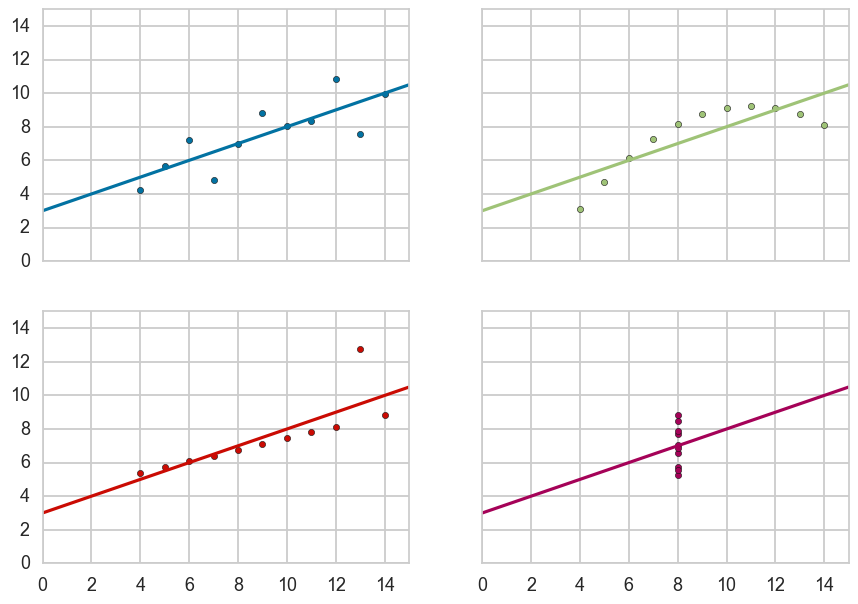

In [3]:
g = yb.anscombe()

## Load Datasets for Example Code

Yellowbrick has provided several datasets wrangled from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/) to present the following examples. If you haven't downloaded the data, you can do so by running:

```
$ python download.py
```

In the same directory as the example notebook. Note that this will create a directory called `data` that contains subdirectories with the given data. 

In [11]:
from download import download_all 

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
        
    
    # Return the data frame
    return pd.read_csv(path)

### Morgan's Data Read in No Show Medical Appointment Data from Kaggle

For the purpose of this analysis I will NOT clean the variable names even though that should be conducted

In [6]:
no_show = pd.read_csv("/Users/mmendis/Projects/local_data/No-show-Issue-Comma-300k.csv")

In [7]:
no_show.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [9]:
no_show.columns.values

array(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'], dtype=object)

In [19]:
no_show.describe()

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808017,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,-13.841813
std,22.809014,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [21]:
features = ['Age','Gender','AppointmentRegistration','ApointmentData',
            'DayOfTheWeek','Diabetes','Alcoolism','HiperTension',
            'Handcap','Smokes','Scholarship','Tuberculosis','Sms_Reminder','AwaitingTime']

numerical_features = no_show.describe().columns.values

## Feature Analysis 

Feature analysis visualizers are designed to visualize instances in data space in order to detect features or targets that might impact downstream fitting. Because ML operates on high-dimensional data sets (usually at least 35), the visualizers focus on aggregation, optimization, and other techniques to give overviews of the data. It is our intent that the steering process will allow the data scientist to zoom and filter and explore the relationships between their instances and between dimensions.

At the moment we have three feature analysis visualizers implemented:

- Rank2D: rank pairs of features to detect covariance 
- RadViz: plot data points along axes ordered around a circle to detect separability 
- Parallel Coordinates: plot instances as lines along vertical axes to detect clusters 

Feature analysis visualizers implement the `Transformer` API from Scikit-Learn, meaning they can be used as intermediate transform steps in a `Pipeline` (particularly a `VisualPipeline`). They are instantiated in the same way, and then fit and transform are called on them, which draws the instances correctly. Finally `poof` or `show` is called which displays the image.  

In [8]:
# Feature Analysis Imports 
# NOTE that all these are available for import from the `yellowbrick.features` module 
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 

### Rank2D 

Rank1D and Rank2D evaluate single features or pairs of features using a variety of metrics that score the features on the scale [-1, 1] or [0, 1] allowing them to be ranked. A similar concept to SPLOMs, the scores are visualized on a lower-left triangle heatmap so that patterns between pairs of features can be easily discerned for downstream analysis. 

In [29]:
pd.DataFrame(numerical_features)

,0
0,Age
1,Diabetes
2,Alcoolism
3,HiperTension
4,Handcap
5,Smokes
6,Scholarship
7,Tuberculosis
8,Sms_Reminder
9,AwaitingTime


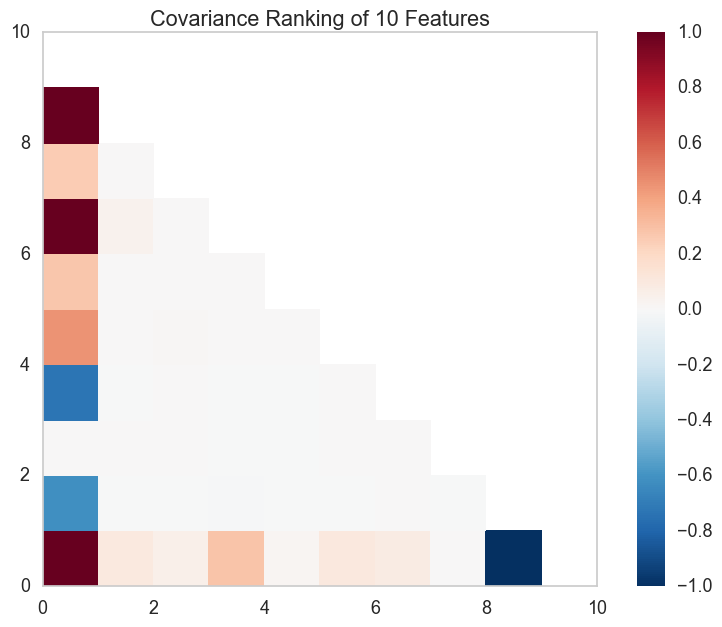

In [25]:
# For this visualizer numerical features are required 
X = no_show[numerical_features].as_matrix()
y = no_show.Status.as_matrix()

# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=numerical_features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

#### Diagnostic Interpretation from Rank2D(Covariance):

Some features share covariance with age but most of the features do not share any measureable covariance.

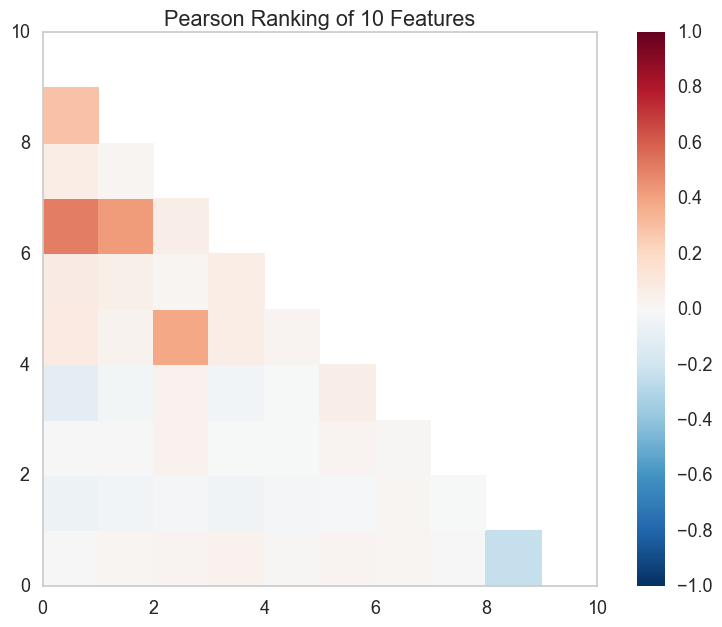

In [26]:
# Instantiate the visualizer with the Pearson ranking algorithm 
visualizer = Rank2D(features=numerical_features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

#### Diagnostic Interpretation from Rank2D(Pearson):

Some features share a positive linear relation mostly with age and a little bit with diabetes but most of the features do not demonstrate a relationship.

In [12]:
# Load the classification data set
data = load_data('credit') 

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.default.as_matrix()

### RadViz 

RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformely around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This meachanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization. 

Data scientists use this method to dect separability between classes. E.g. is there an opportunity to learn from the feature set or is there just too much noise?

In [58]:
#Need to specify the classes of interest
classes = no_show.Status.unique().tolist()

# For this visualizer numerical features are required
X = no_show[numerical_features].as_matrix()
# Additional step here of converting categorical data 0's and 1's
y = no_show.Status.replace(classes,[0,1]).as_matrix() 



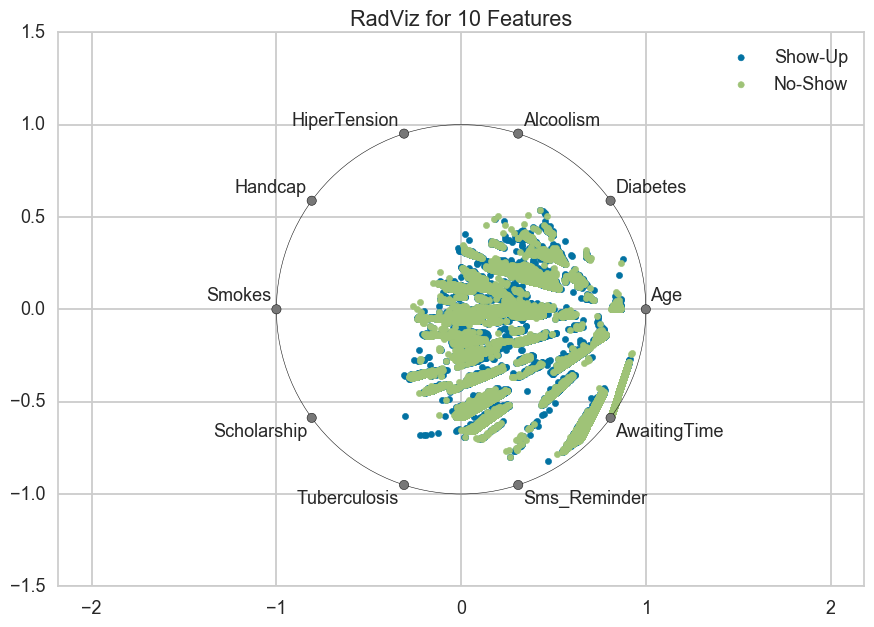

In [59]:
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=numerical_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

For regression, the RadViz visualizer should use a color sequence to display the target information, as opposed to discrete colors.

#### Diagnostic Interpretation from RadViz:

It doesn't appear from this visual for there to be much differentiation between the classes. The dimensionality still interestingly shows that the other features have any interesting relations hip with Age.

### Parallel Coordinates 

Parallel coordinates displays each feature as a vertical axis spaced evenly along the horizontal, and each instance as a line drawn between each individual axis. This allows many dimensions; in fact given infinite horizontal space (e.g. a scrollbar) an infinite number of dimensions can be displayed! 

Data scientists use this method to detect clusters of instances that have similar classes, and to note features that have high varaince or different distributions. 

In [11]:
# Load the classification data set
data = load_data('occupancy') 

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

In [61]:
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(classes=classes, features=numerical_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

KeyboardInterrupt: 

## Classifier Evaluation 

Classification models attempt to predict a target in a discrete space, that is assign an instance of dependent variables one or more categories. Classification score visualizers display the differences between classes as well as a number of classifier-specific visual evaluations. We currently have implemented three classifier evaluations:

- ClassificationReport: Presents the confusion matrix of the classifier as a heatmap 
- ROCAUC: Presents the graph of receiver operating characteristics along with area under the curve
- ClassBalance:  Displays the difference between the class balances and support 

Estimator score visualizers wrap Scikit-Learn estimators and expose the Estimator API such that they have fit(), predict(), and score() methods that call the appropriate estimator methods under the hood. Score visualizers can wrap an estimator and be passed in as the final step in a Pipeline or VisualPipeline.

In [62]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance

### Classification Report 

The classification report visualizer displays the precision, recall, and F1 scores for the model. Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection. 

In [63]:
# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

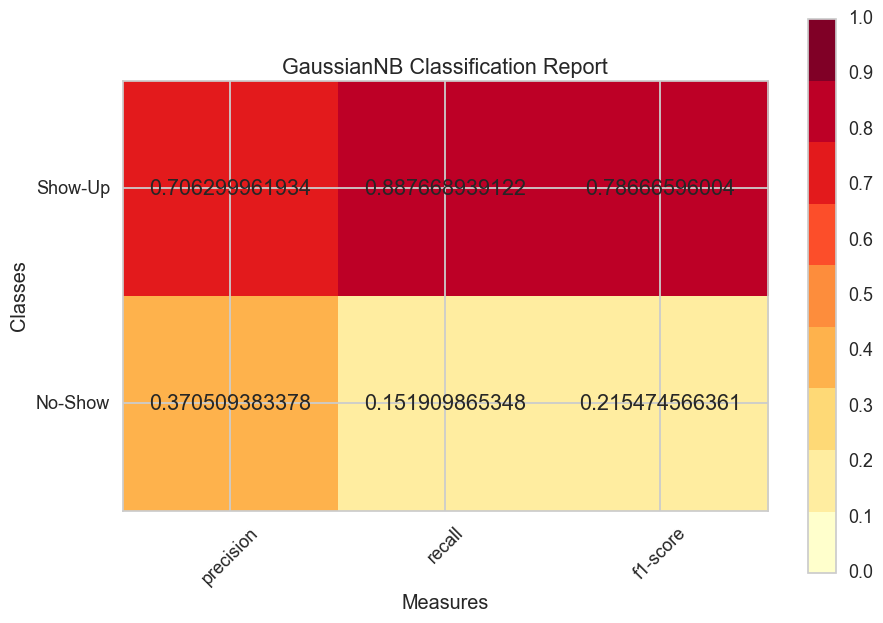

In [64]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

In [68]:
no_show.groupby('Status').AppointmentRegistration.count()

Status
No-Show     90731
Show-Up    209269
Name: AppointmentRegistration, dtype: int64

### ROCAUC 

Plot the ROC to visualize the tradeoff between the classifier's sensitivity and specificity.

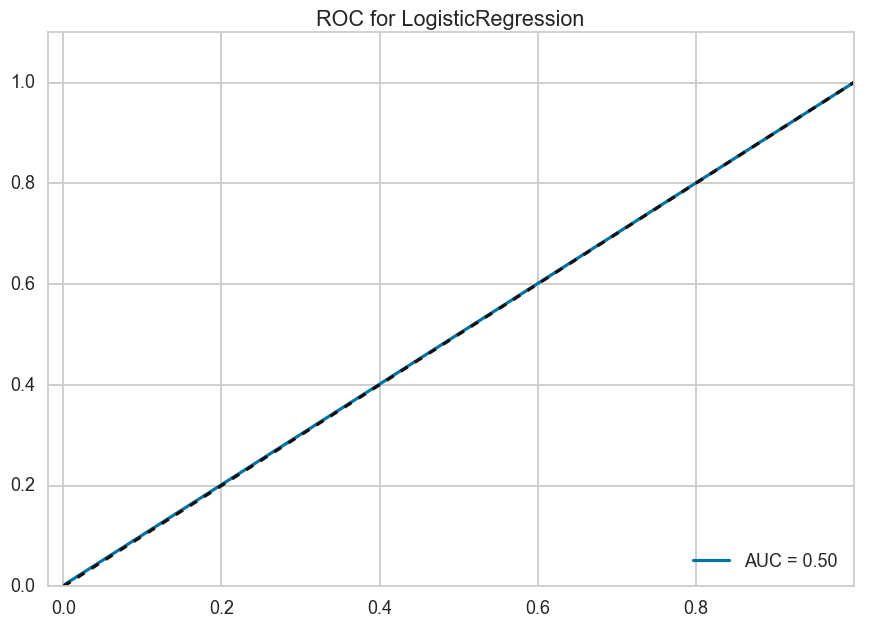

In [65]:
# Instantiate the classification model and visualizer 
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### ClassBalance 

Class balance chart that shows the support for each class in the fitted classification model.

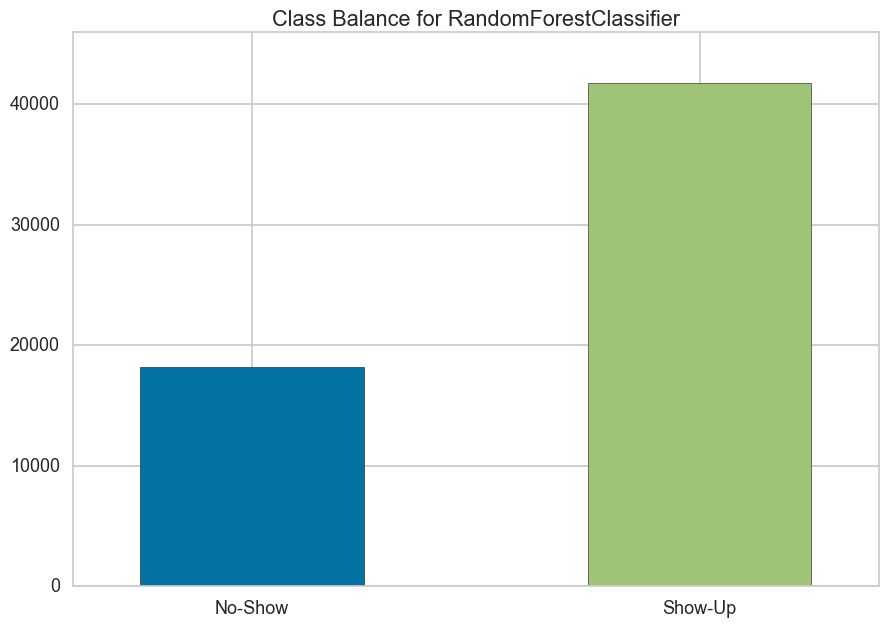

In [66]:
# Instantiate the classification model and visualizer 
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data